In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

# QUESTION 4

## Implemaentation of Kohonen’s Self-Organizing Network


---


### From the question we are told that:
#### The train set consist of 24 colours 
#### The output is a 100 by 100 grid of neurons representing colour clusters 
#### The number of epochs is $T = 1000$
#### The initial learning rate has a value $\alpha_{o}  =  0.8$ 
#### The decay of the learning rate is mathematically defined as 
\begin{align}
    \alpha_{k} = \alpha_{o}e^{-\frac{k}{T}}
\end{align}
#### Here k represents the current epoch
#### The topological neighbourhood $N_{i,j}(k)$ of node (j) around the winning unit (i) is given by
\begin{align}
    N_{i,j}(k) = e^{[-\frac{d_{i,j}^2}{2\sigma^2(k)}]}
\end{align}
#### Here $\sigma$ is threshold distance for a neuron to be considered as neighbour to the winning neuron(know as radius) and it is defined from the question as 
\begin{align}
    \sigma_{k} = \sigma_{o}e^{[-\frac{k}{T}]}
\end{align}
#### The variation for $\sigma_o$ for each training stage as given is the question is  $\sigma_o$ = 1, 10, 30, 50, 70. 

<p>&nbsp;</p>

#### According to the question we are to generate figure at defined epochs of the training , also we are to carry out the training for each value of $\sigma_o$ and we are to provide a description of how the output changes with the change in $\sigma_o$

<p>&nbsp;</p>

#### To achieve this we created as class name `KSOM` and then defined all the neccessary function.This `call` method within this class is then called with different values of $\sigma_o$ in order to carry out the analysis and come up with an observation

### Creating the training data

           [255, 99, 71], --> tomato
           [255, 127, 80], --> coral
           [205, 92, 92], -->  indian red
           [240, 128, 128], --> light coral
           [0, 128, 0],  -->  green
           [0, 100, 0], -->   dark green
           [34, 139, 34], --> 	forest green
           [144, 238, 144], --> light green
           [85, 107, 47],  --> 	dark olive green
           [65, 105, 225], --> royal blue
           [0, 0, 205],  --> 	medium blue
           [25, 25, 112], --> midnight blue
           [0, 128, 128], --> Teal
           [255, 255, 0], --> 	Yellow
           [255, 192, 203], --> pink
           [0, 128, 128],  --> Teal
           [255, 255, 0], --> 	Yellow
           [255, 192, 203], --> pink
           [135, 206, 250], --> light sky blue
           [173, 216, 230], --> light blue
           [139, 0, 0], --> dark red
           [255, 69, 0], --> 	orange red
           [154, 205, 50], --> yellow green
           [0, 255, 0] --> lime

In [2]:
raw_data=[ [255, 99, 71],
           [255, 127, 80],
           [205, 92, 92],
           [240, 128, 128],
           [0, 128, 0],
           [0, 100, 0],
           [34, 139, 34],
           [144, 238, 144],
           [85, 107, 47],
           [65, 105, 225],
           [0, 0, 205],
           [25, 25, 112],
           [0, 128, 128],
           [255, 255, 0],
           [255, 192, 203],
           [0, 128, 128],
           [255, 255, 0],
           [255, 192, 203],
           [135, 206, 250],
           [173, 216, 230],
           [139, 0, 0],
           [255, 69, 0], 
           [154, 205, 50],
           [0, 255, 0] 
          ]

In [3]:
# Converting the data to numpy array and shuffling
raw_data = np.array(raw_data)
# np.random.shuffle(raw_data)

In [4]:
# Normalizing the data by dividing by 255
data = raw_data/255

In [5]:
# obtaining the shape of the data 
a = data.shape[0]
b = data.shape[1]

In [6]:
# defining the output dimension
dimension = np.array([100,100])

In [7]:
class KSOM:
  # Defining the constructor 
  def __init__(self, data, epochs, a, b, init_alpha, dimension):
    
    self.data = data
    self.epochs = epochs
    self.init_alpha = init_alpha
    self.a = a
    self.b = b
    self.output = np.random.random((dimension[0],dimension[1],b))
    self.epoch = 0

  #Defining  the print function
  def print_grid(self , output, epoch, radius):
    %matplotlib inline
    fig = plt.figure( figsize=( 10 , 10 ) )
    ax=fig.add_subplot(111,aspect="equal")
    ax.set_xlim((0,output.shape[0]+1))
    ax.set_ylim((0,output.shape[1]+1))
    ax.set_title(" Kohonens Self Organising Map 100 X 100 Grid")
    for u in range(1,output.shape[0]+1):
      for v in range(1,output.shape[1]+1):
        ax.add_patch(patches.Rectangle((u-0.5,v-0.5),1,1,
                                       facecolor=output[u-1,v-1,:],edgecolor=None))
    string = f'Image for {epoch} epoch at radius :{radius}.png'
    plt.savefig(string)


  # Defining the function to decrease the radius as the training proceeds
  def degrade_radius(self , init_radius, epoch ,epochs):
    return init_radius*np.exp(-epoch/epochs)
  
  #Defining the function to decrease the learning rate as the training proceeds
  def degrade_alpha(self, init_alpha, epoch, epochs):
    return init_alpha* np.exp(-epoch/epochs)

 # Defining the  neighbourhood function
  def influence_cal(self, dist, radius):
    return np.exp(-dist/(2*(radius**2)))
  
  # Defining the function to determine the 
  def obtain_distance(self, c, d):
      return np.sqrt(np.sum((c - d)**2))
  
  # This function finds the winner node and its index
  def learn_out(self, point, output):
    dummy_dist=1000000
    for x in range(output.shape[0]):
        for y in range(output.shape[1]):
            unit=output[x,y].reshape(1,-1)
            point=point.reshape(1,-1)
            dist = self.obtain_distance(unit,point)
            if dist < dummy_dist:
                dummy_dist = dist
                winner = output[x,y]
                winner_idx=np.array([x,y])
    return (winner, winner_idx)

  #This function updtades output grid
  def fit_map(self, epoch, epochs, output, init_radius,init_alpha,data,a,b):
    #randomly selecting datapoint from the dataset
    point = data[np.random.randint(0,a),:]

    # assigning the value for radius 
    radius = self.degrade_radius(init_radius, epoch, epochs)

    #assigning the value for learning rate
    alpha = self.degrade_alpha(init_alpha, epoch, epochs)

    #obtaining the winner node and its index
    winner, winner_idx = self.learn_out(point,output)

    #Iterate through the grid to update it 
    for x in range(output.shape[0]):
      for y in range(output.shape[1]):
        net = output[x,y].reshape(1,b)

        #Obtain the distance between position of the winner and that of
        #every other node
        diff = self.obtain_distance(np.array([[x,y]]), winner_idx.reshape(1,2))

        if diff < radius:
          # This provide the amount of upadate a node would get base on its 
          # closeness to the winner node
          impact = self.influence_cal(diff , radius)

          #updating the node on a grid
          new_node_val = net + (alpha * impact * (point.reshape(1,-1) - net))

          #Replace the old grid node with the update
          output[x,y] =  new_node_val.reshape(1,3)

    

  # defining the call function through which the values of differnts values of 
  # radius for differnt training session
  def call(self , init_radius):
    self.print_grid(self.output, self.epoch, init_radius) 
    for epoch in range(0 , self.epochs+1):
      self.epoch = epoch
      self.fit_map(epoch, self.epochs, self.output,
              init_radius,self.init_alpha,self.data,self.a,self.b)
      if(epoch == 20 or epoch == 40 or epoch == 100 or epoch == 1000):
        self.print_grid(self.output, self.epoch, init_radius)

    self.epoch = 0









  

## Intialization of class and analysis 
#### Here we initialize the class with `initial learning rate = 0.8`
#### Also for the call method we start the value of radius($\sigma_o$)
#### with  `1` and then increase it to the rest of the values(`10, 30, 50, 70`) defined in the question as  we carry out the analysis. 

In [8]:
ksom_1  = KSOM(data, 1000, a, b, 0.8, dimension)

### Inorder to get different output of the grid for different values of $\sigma_o$ just change the argument to the `ksom_1` object call function below to the desired value of $\sigma_o$ and the imgages for various epochs will be stored on your local system.

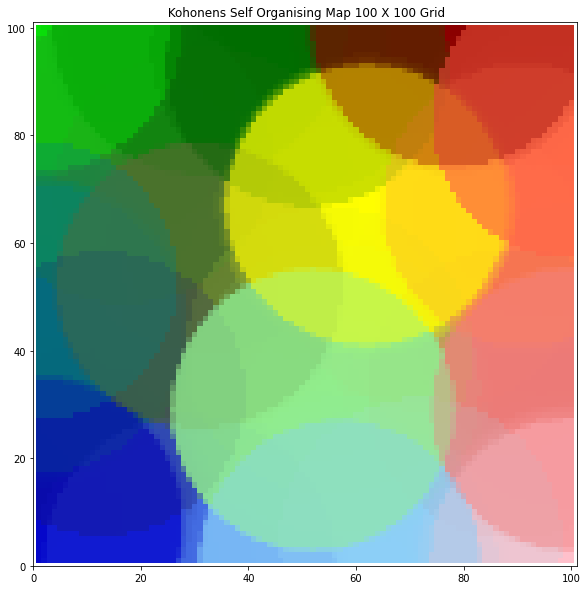

In [9]:
ksom_1.call(70)